<h3>Introduction</h3>
    <p>In a nutshell, this is a quick introduction to understand the potential of data science and machine learning used in the oil industry. <br/>
    With the growing impact of Artificial Inteligence, data is now a very crutial asset. This is a quick introduction to understand the potential of data science and machine learning used in the oil industry.<br/>
    Excel is the most common tool for any type of analysis in the industry. However, it is certainly limited to basic data analysis, manipulation and to construct predictive models.<br/>
    The main objectives here are to show the potential and give you the tools to create your own view of the markets and apply it to other problems or even industries.
   <p/>

<h3>Methodology</h3>
<p>I have tailored a quick exercise on how to use artificial intelligence using oil price and share price of a few companies. <br>
    The notebook will focus on loading data and doing some illustrative data visualisations along the way. 
    <br>I will then use linear regression, cluster analysis and Random Forest to create a model predicting the share price in the short term.<br>
 </p>

<h3>Technical Overview</h3>
<h4>Dataset used</h4>
<p>1. Oil price dataset from the U.S Energy Information administration.<br>
2. Share price dataset from Yahoo Finance in a daily frequency from the following companies:
    
Shell (RDSB.L)<br>

BP (BP.L)<br>

Cairn Energy (CNE.L)<br>

Premier Oil (PMO.L)<br>

Statoil (STL.OL)<br>

TOTAL (FP.PA)<br>

ENGIE (ENGI.PA)<br>

Schlumberger (SLB.PA)<br>

REPSOL (REP.MC)<br>

There are three parts that my workflow will cover:<br>
1. Loading data and introduction to feature engineering<br>
2. Data Analysis<br>
3. Machine Learning and Prediction<br>

</p>

<p>The oil primary dataset includes an excel spreadsheet with oil price and date in a daily frequency. The stock data comes in the shape of a csv file with also daily frequency.

We will load the data, read and transform it into a master dataframe.</p>

In [1]:
# Start loading libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
# Read oil price and transform data

xls_file=pd.ExcelFile("RBRTEd.xls") # Read Excel
brent=xls_file.parse("Data 1") # Read sheet Data 1
brent.columns=brent.iloc[1] # set row 1 as column name
brent=brent.loc[2:] # remove first 2 rows
brent["Date"]=brent["Date"].astype('datetime64[ns]') # Convert column to date format
brent.columns=["date","oil_price"]
brent.head()

,date,oil_price
2,1987-05-20,18.63
3,1987-05-21,18.45
4,1987-05-22,18.55
5,1987-05-25,18.6
6,1987-05-26,18.63


In [3]:
# Loop to read all share price files and transform data
shares=["RDSB.L","BP.L","CNE.L","PMO.L","STL.OL","FP.PA","REP.MC","ENGI.PA","SLB.PA"]

all_data=pd.DataFrame() # here we will store all the data from all shares and oil price in a master dataframe
for index in range(len(shares)):
    stock=pd.DataFrame()

# 1.- Read files
    stock=pd.read_csv("input/"+shares[index]+".csv")     
# 2.- Transform data
    stock=stock[["Date","Close"]]       
    stock["Date"]=stock["Date"].astype('datetime64[ns]')
    stock.columns=["date","share_price"]
    test=pd.DataFrame(brent) # VLOOKUP equivalent in Python to merge 2 sets of data
    output=stock.merge(test,on="date",how="left")
    stock["oil_price"]=output["oil_price"]
    stock['share_price']=pd.to_numeric(stock['share_price'], errors='coerce').dropna(0)
    stock['oil_price']=pd.to_numeric(stock['oil_price'], errors='coerce').dropna(0)
    stock["year"]=pd.to_datetime(stock["date"]).dt.year # Create a column with the year to filter later
    stock["name"]=shares[index]
    stock = stock.dropna() # get rid of all the NAN rows.
# 3.- Feature Engineering. Create new column with scaled share price from 0 to 1.
#     This will help us comparing companies later on.
    from sklearn.preprocessing import MinMaxScaler
    scaler=MinMaxScaler()
    stock["share_price_scaled"]=scaler.fit_transform(stock["share_price"].to_frame())
# 4.- Append data to a master dataframe
    all_data=all_data.append(stock) #append data to one matrix
    
all_data.head()

,date,share_price,oil_price,year,name,share_price_scaled
0,2000-05-15,1193.597412,28.26,2000,RDSB.L,0.309123
1,2000-05-16,1191.409302,28.78,2000,RDSB.L,0.307755
2,2000-05-17,1164.911255,28.40,2000,RDSB.L,0.291187
3,2000-05-18,1204.315063,28.90,2000,RDSB.L,0.315824
4,2000-05-19,1215.334106,29.01,2000,RDSB.L,0.322714


<h3>Data Analysis</h3>
    <p>This analysis contains a few of the tools with the purpose of exploring different visualisations that can be useful in a Machine Learning problem. <br>It is not going to be a detailed analysis and I am not going to bring additional features like key events or other metrics to try to explain the patterns in the plots. Again, the idea is to show you a glimpse of the potential of data analysis with python.

Here is an outline of the main charts that we will make:

2.1.- Simple line plot oil price

2.2.- Pairplot on BP share price from years 2000 to 2017 using a color gradient for different years

2.3.- Pairplot on BP share price using last five years

2.4.- Violin plot of the oil price

2.5.- Violin plot of the share price of several oil and gas companies

2.6.- Jointplot comparison of Premier Oil and Statoil

2.7.- Plot of oil price vs share price of different companies using different templates</p>

<h5>2.1.Simple line plot oil price</h5>

<AxesSubplot:xlabel='date'>

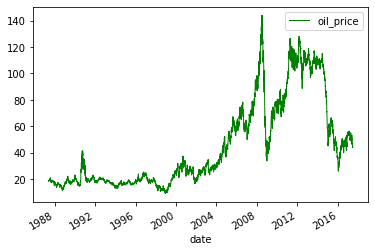

In [4]:
brent[['date','oil_price']].set_index('date').plot(color="green", linewidth=1.0)  

<h5>Pairplot on BP share price from years 2000 to 2017 using a color gradient for different years</h5>
<p>To begin with a more advanced data analysis, we will create a pairplot using seaborn to analyse BP share price.</p>

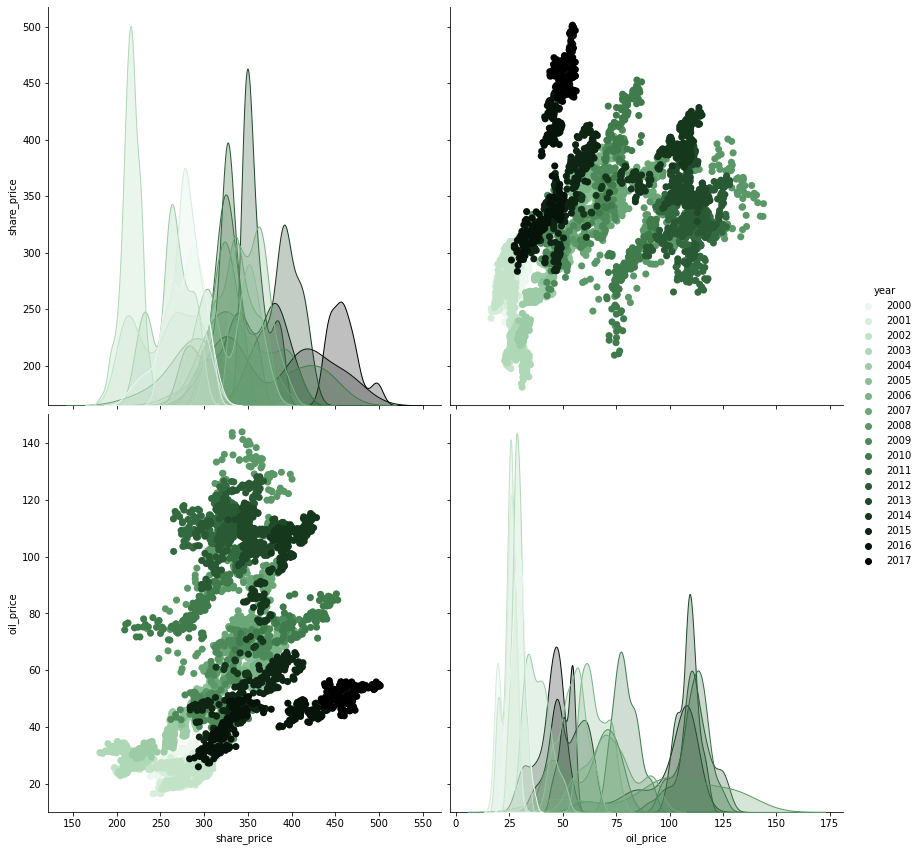

In [5]:
palette=sns.cubehelix_palette(18, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.pairplot(all_data[all_data['name']=="BP.L"].drop(["share_price_scaled"],axis=1),
             hue="year",palette=palette,size=6,markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0))

<p>The pairplot shows all the pairwise relationships in a dataset and the univariate distribution of the data for each variable. It gives us a reasonable idea about variable relationships. I have also built a palette with a gradient color with increasing darkness with time. Have a look at the combination of oil price vs BP share price in the top-center plot.<br>

Notice also the differences in distribution simetries comparing the oil price and share prices. Bear in mind this is just a basic analysis on an oil company, with a specific characteristics like size, different events during the last 17 years. Later on we will compare different companies.<br>
There is much more information that can be extracted from this plot, but we will stop here and keep going to next step. Lets try to filter in the last five years where we are covering a large spectrum in the oil price and see if we see more.</p>

<h5>2.3.- Pairplot on BP share price using last five years</h5>

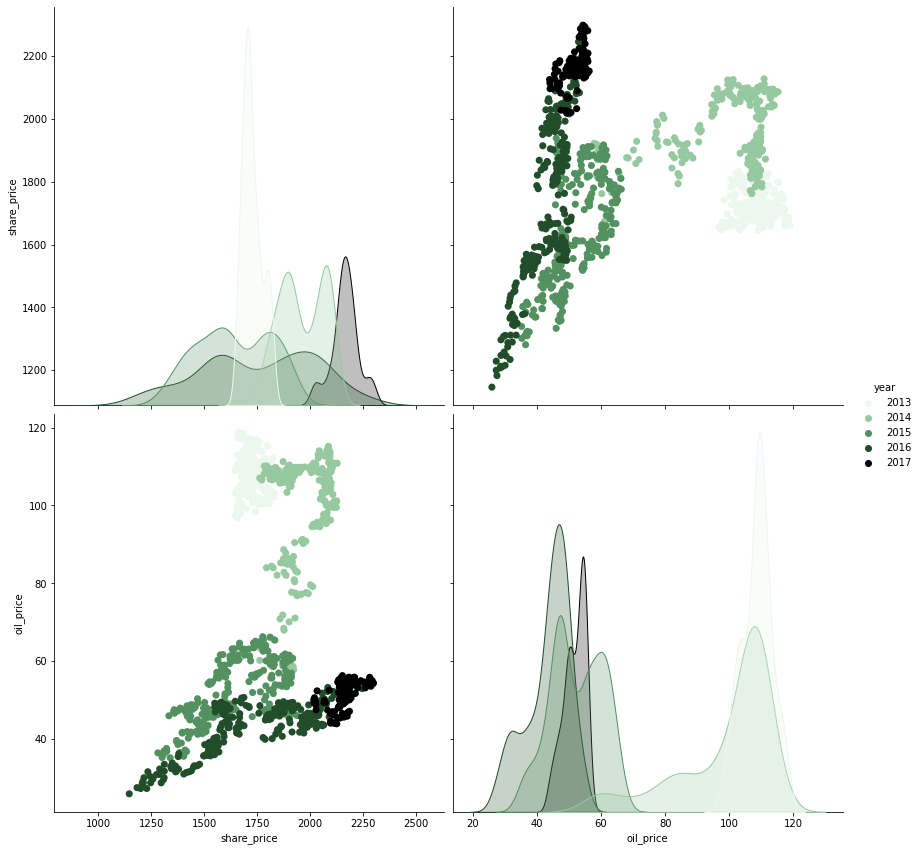

In [6]:
# Pairplot on less data 2013 to 2017 using Royal Dutch Shell (LON) stock price
# Just for the last 5 years
all_data13=all_data[all_data["year"]>2012]
palette=sns.cubehelix_palette(5, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.pairplot(all_data13[all_data13['name']=="RDSB.L"].drop(["share_price_scaled"],axis=1),
             hue="year",palette=palette,size=6,markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0))

<p>In the last five years the distribution tells us that the oil price have been mostly swinging in between 30 to 60 usd/bbl and 100 to 120 usd/bbl. Between 60 and 100 usd/bbl not much data (bottom right plot)<br>. 
Also we see a positive with high confidence correlation for years 2016/17 of share price and oil price.(bottom left plot)<br>
Notice, the year when everything changed for this company was 2014, we will see later if that's the case for other companies.(bottom left plot) <br>In 2014, there is a change in pattern correlations and high variability of data. That was the boundary between the two worlds, two market behaviors, a change in regime irrespective of the independent events of the company. Several interpretations can be obtained from this plot. I will not plot this for all the other companies.</p>

<h5>2.4.- Violin plot of the oil price</h5>
<p>To have a bit of a feeling on how sensitive is the stock of each company to the oil price we will build a few violin plots. This is basically a box plot with the probability density data.</p>

<AxesSubplot:xlabel='year', ylabel='oil_price'>

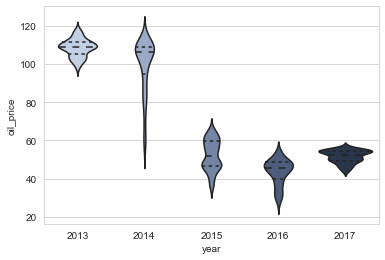

In [7]:
# Violin Plot Oil price on last 5 years 
sns.set_style("whitegrid")
palette=sns.cubehelix_palette(5, start=2.8, rot=0, dark=0.2, light=0.8, reverse=False)

sns.violinplot(x="year", y="oil_price", data=all_data13[all_data13['name']=="RDSB.L"],
               inner="quart", palette=palette, trim=True)

<p>The above plot highlights the fluctuation of oil prices from 2010 to 2017.<br>
In 2014, the oil price fluctuated from 40 to 120 usd/bbl.<br>
Oil prices where less volatile in 2017<br>
</p>

<h5>2.5.- Violin plot of the share price of several Oil and Gas companies</h5>

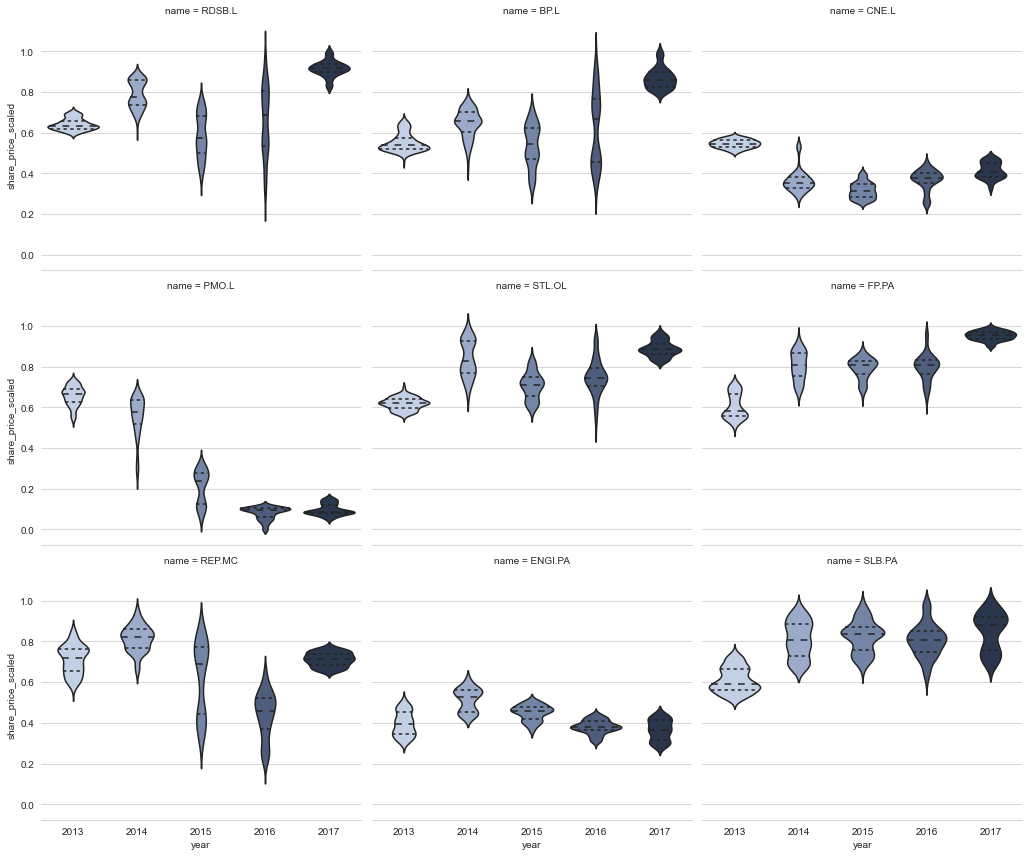

In [8]:
# Violin Plot Oil price on last 5 years
sns.factorplot(x="year", y="share_price_scaled", col='name', col_wrap=3,kind="violin",
               split=True, data=all_data13,inner="quart", palette=palette, trim=True,size=4,aspect=1.2)
sns.despine(left=True)

<p>Just a quick note on the large range of the oil price during 2014, however the variability in the stock price range and distribution for different companies was different.<br> A few companies were more sensitive than others. Notice that all the stock prices are scaled between 0 and 1 using its max/min values in the last 20 years approx.<br> That may cause missleading interpretations. This is just an exercise to do a bit of data analysis using the shape and patterns as a third dimension.</p>

<h5>2.6.- Jointplot comparison of Premier Oil and Statoil</h5>

<p>The next plot is an attempt to draw two variables with bivariate and univariate graphs. Just a different way of visualizing data using a jointplot. The example is with Premier Oil share price.</p>

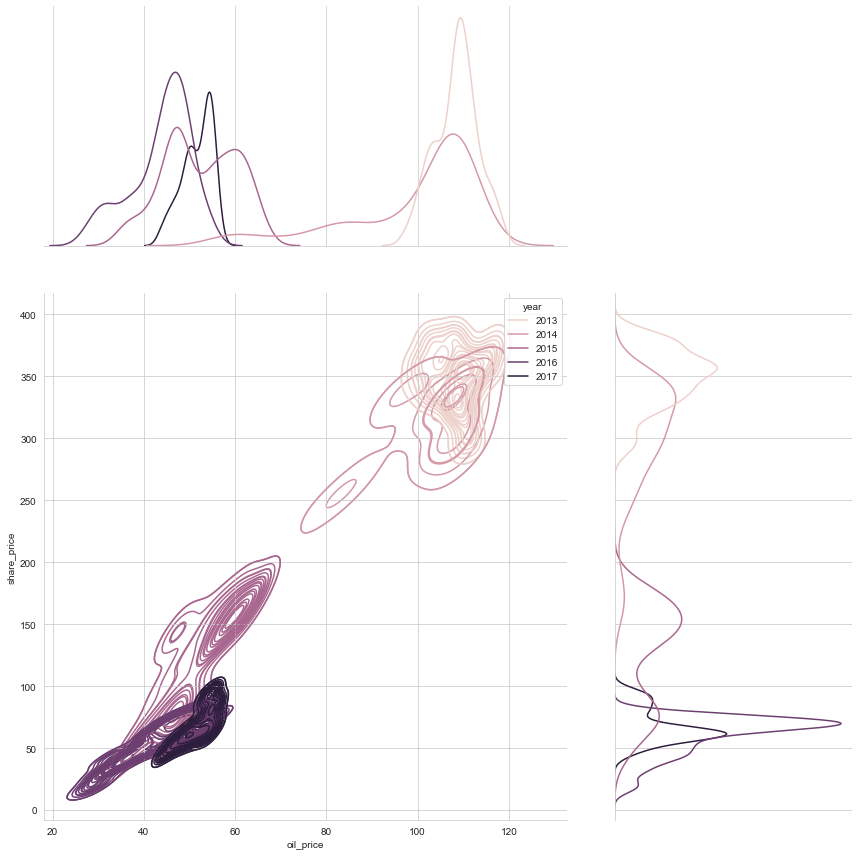

In [9]:
# joint plot using 5 years for Premier Oil

sns.jointplot("oil_price", "share_price",data=all_data13[all_data13['name']=="PMO.L"],kind="kde",
              hue="year",size=12,ratio=2,color="red").plot_joint(sns.kdeplot, zorder=0, n_levels=20)

<p>The above plot shows how the oil price affected the share or stock price of the Premier Oil company.<br>
In 2016, Premier Oil share price was mostly 60 while the oil price was 45. This was the worse year of business.<br>
In 2013, the share price was mostly 355 while the oil price was 110. This was the best year of business.<br>
</p>

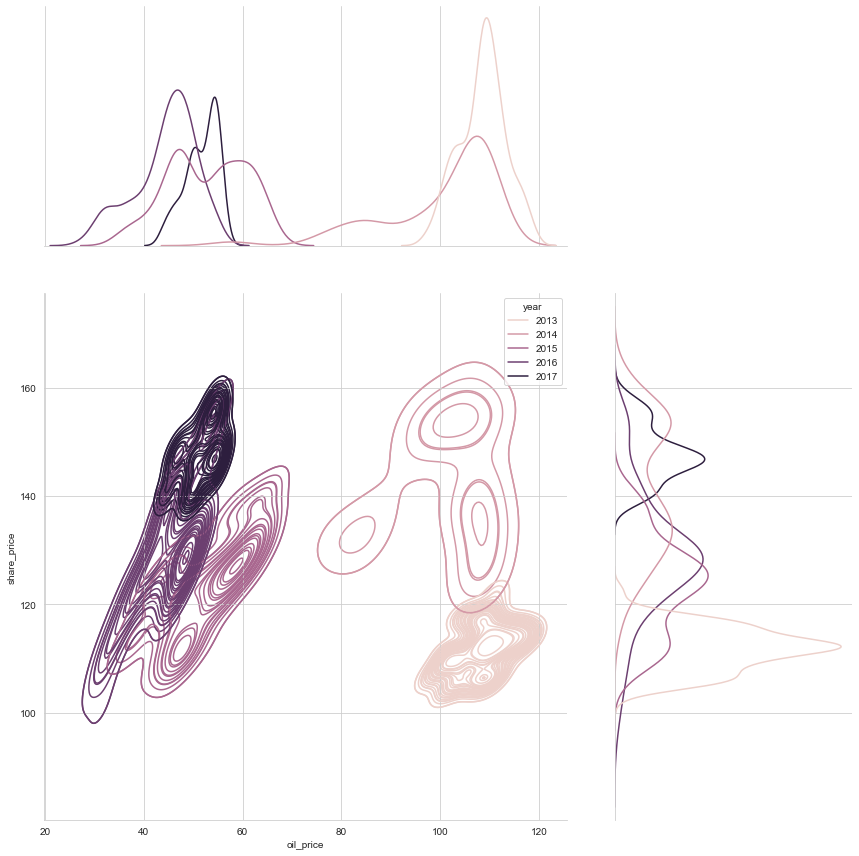

In [10]:
# joint plot using 5 years for Statoil
sns.jointplot("oil_price", "share_price",data=all_data13[all_data13['name']=="STL.OL"],kind="kde",
              hue="year",size=12,ratio=2,color="blue").plot_joint(sns.kdeplot, zorder=0, n_levels=20)

<p>The above plot shows how the oil price affected the share or stock price of the StatOil company.<br>
Notice a very high correlation in 2013, both stock price and oil price between 100 and 120. This was a very bad year for Statoil company because they sold each share of their company at exactly the cost of a barrel of oil i.e 110 USD.<br>
2017 was a decent year for Statoil company, selling their shares at 148/stock while oil price was 50/bbl.<br>
</p>

<p>Notice the difference in share price distribution for the two companies and the shape of the density chart.</p>

<h5>2.7.- Plot of oil price vs share price of different companies using different templates</h5>

<p>The next analysis will do a grid of charts for all companies to check if we see any patterns.</p>

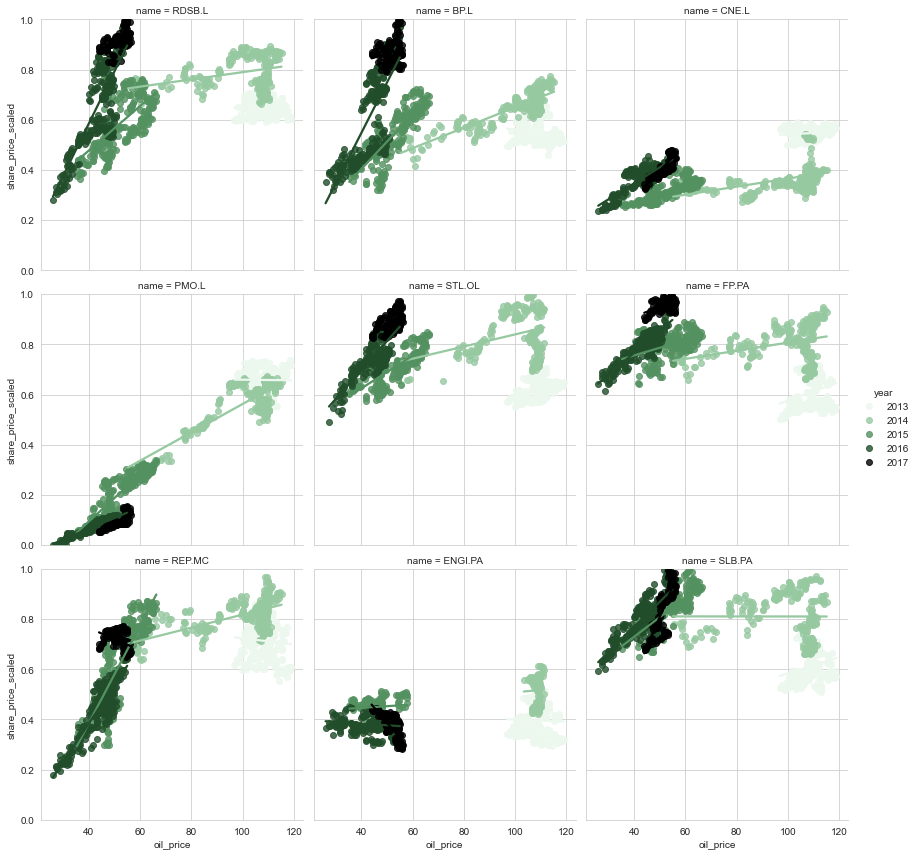

In [11]:
# Using 5 years for all companies

palette=sns.cubehelix_palette(5, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.lmplot(x="oil_price", y="share_price_scaled",hue="year", col="name",ci=None, 
           col_wrap=3, data=all_data13, order=1,palette=palette,size=4).set(ylim=(0, 1))

<h3>Machine Learning and Prediction</h3>

<p>Here is an outline of the machine learning problems that we will solve:

3.1.- Cluster analysis on Shell data
    
3.2.- Linear regression on Royal Dutch Shell share price vs oil price
    
3.3.- Random Forest on Royal Dutch Shell share price vs oil price</p>

<h5>3.1.- Cluster analysis on Shell data</h5>

<p>In the following example we will divide the data from Royal Dutch Shell into 6 groups using cluster analysis. Clustering is the task of grouping a set of objects in such a way that objects in the same group are more similar to each other than to those in other groups.</p>

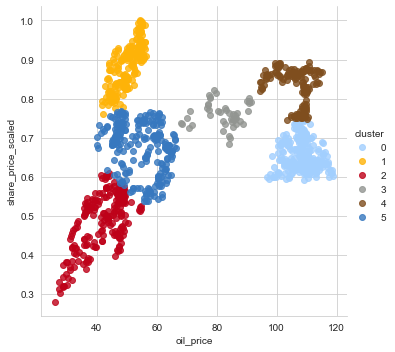

In [12]:
# Unsupervised Learning - Cluster analysis on Shell data
from sklearn.cluster import KMeans

shell=pd.DataFrame()
shell=all_data13[all_data13['name']=="RDSB.L"]
# We need to scale also oil price, so clustering is not influenced by the relative size of one axis.
shell["oil_price_scaled"]=scaler.fit_transform(shell["oil_price"].to_frame())
shell["cluster"] = KMeans(n_clusters=6, random_state=1).fit_predict(shell[["share_price_scaled","oil_price_scaled"]])

# The 954 most common RGB monitor colors https://xkcd.com/color/rgb/
colors = ["baby blue", "amber", "scarlet", "grey","milk chocolate", "windows blue"]
palette=sns.xkcd_palette(colors)

sns.lmplot(x="oil_price", y="share_price_scaled",ci=None,palette=palette, hue="cluster",fit_reg=0 ,data=shell)

<p>There are many application of practical problems using cluster analysis. In this example we are just using it for data visualization and grouping.</p>

<h5>3.2.- Linear regression on Royal Dutch Shell share price vs oil price</h5>

<p>Next we will construct a simple linear regression model using supervised learning. The objective is to evaluate the prediction of data from the last 100 days using data trained from years 2016/17 (excluding test data). <br>Train data is the data used to construct the model and test data is the data we are trying to predict.</p>

In [13]:
# Supervised learning linear regression
#==============================================================================

from sklearn import linear_model

# 1.- Data preparation
shell15=pd.DataFrame()
shell15=all_data13[(all_data13['name']=="RDSB.L") & (all_data13['year']>2015 )] # Extract data from years 2016/17
shell15=shell15[["share_price","oil_price"]].reset_index()

# Just using 1 variable for linear regression. To try with more variables use randomforest
# Split the data into training/testing sets
train = shell15[:-100]
test = shell15[-100:]

x_train=train["oil_price"].to_frame() #converts the pandas Series to numpy.ndarray
y_train=train['share_price'].to_frame()
x_test=test["oil_price"].to_frame() #converts the pandas Series to numpy.ndarray
y_test=test['share_price'].to_frame()

# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(x_train,y_train)

# The coefficients
print("Coefficients: ",  float(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_train) - y_train) ** 2))

Coefficients:  35.25408169124279
Mean squared error: 23210.67


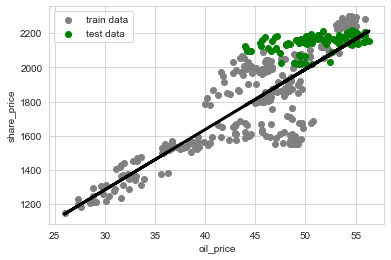

In [14]:
# Plot outputs using matplotlib
plt_train=plt.scatter(x_train, y_train,  color='grey')
plt_test=plt.scatter(x_test, y_test,  color='green')
plt.plot(x_train, regr.predict(x_train), color='black', linewidth=3)
plt.plot(x_test,regr.predict(x_test),  color='black', linewidth=3)
plt.xlabel("oil_price")
plt.ylabel("share_price")
plt.legend((plt_train, plt_test),("train data", "test data"))
plt.show()

<p>In the chart above you can see an approximation of how Linear Regression is fit and trying to predict results from test data. It looks like the prediction data is quite off for lower oil prices.<br> The mean square error of this predictive method is 23210.67. Lets see how a more sofisticated method does on this topic. We are going to work using random forest algorithm.</p>

<h5>3.3.- Random Forest on Royal Dutch Shell share price vs oil price</h5>

<p>Random forest is an ensemble tool which takes a subset of observations and a subset of variables to build a decision trees.<br> It builds multiple such decision tree and amalgamate them together to get a more accurate and stable prediction.</p>

In [15]:
from sklearn.ensemble import RandomForestRegressor
# 1.- Data Preparation
shell15=pd.DataFrame()
shell15=all_data13[(all_data13['name']=="RDSB.L") & (all_data13['year']>2015 )]
shell15=shell15[["share_price","oil_price"]].reset_index()

# Load share price of other variables
shell15['PMO.L']=all_data13[(all_data13['name']=="PMO.L")][-373:].reset_index()['share_price']
shell15['CNE.L']=all_data13[(all_data13['name']=="CNE.L")][-373:].reset_index()['share_price']
shell15['FP.PA']=all_data13[(all_data13['name']=="FP.PA")][-373:].reset_index()['share_price']
shell15['ENGI.PA']=all_data13[(all_data13['name']=="ENGI.PA")][-373:].reset_index()['share_price']

train = shell15[:-100]
test = shell15[-100:]

x_train=train[["oil_price","PMO.L","CNE.L","FP.PA","ENGI.PA"]]
y_train=train['share_price']

x_test=test[["oil_price","PMO.L","CNE.L","FP.PA","ENGI.PA"]] 
y_test=test['share_price'].to_frame()


# 2.- Create Randomforest object usinig a max depth=5
regressor = RandomForestRegressor(n_estimators=200, max_depth=5 )

# 3.- Train data
clf=regressor.fit(x_train, y_train)

# 4.- Predict!
y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)

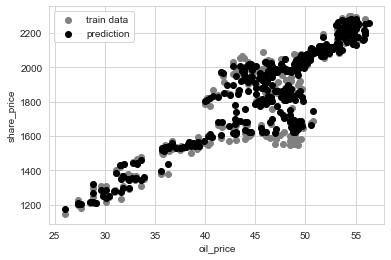

In [16]:
# We are going to have a look at how fitted data looks like:

plt_train=plt.scatter(x_train["oil_price"],y_train,   color='grey')
plt_pred=plt.scatter(shell15["oil_price"], regressor.predict(shell15[["oil_price","PMO.L","CNE.L","FP.PA","ENGI.PA"]]),  color='black')

plt.xlabel("oil_price")
plt.ylabel("share_price")
plt.legend((plt_train,plt_pred),("train data","prediction"))
plt.show()

<p>The model looks really good just predicting the training data.  We will have a look now to how this model predicts on test data.</p>

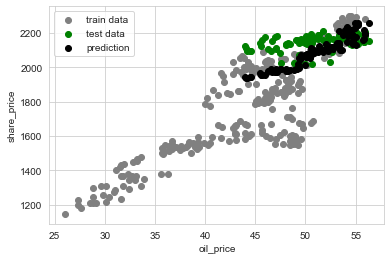

In [17]:
plt_train=plt.scatter(x_train["oil_price"],y_train,   color='grey')
plt_test=plt.scatter(x_test["oil_price"],y_test,   color='green')
plt_pred=plt.scatter(x_test["oil_price"], y_pred,  color='black')

plt.xlabel("oil_price")
plt.ylabel("share_price")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

In [18]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

Mean squared error: 2691.56


<p>The prediction on the test data looks much better now, still somehow innacurate for lower oil price environment.<br/> If you see the mean squared error, we manage to reduce the error from 23210 to 2709. That is 10 times lower than using linear regression.</p>

<h5>Note that when it come to machine learning, the sky is the limit. Much better algorithms can be used with much lower mean squared error. Neural networks alogrithms can achieve 90% accuracy in linear regression problems.</h5>

<p>It is always worth to give it a check to the importance of each parameter:</p>

Feature ranking:
Feature oil_price (0.222709)
Feature PMO.L (0.039609)
Feature CNE.L (0.119908)
Feature FP.PA (0.538939)
Feature ENGI.PA (0.078835)


Text(0, 0.5, 'Importance')

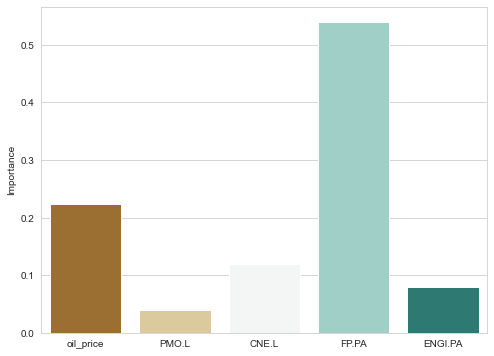

In [19]:
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

<p>It's interesting to see how the importance of the share price of TOTAL is higher than the oil price.<br> This is mostly because they are similar size companies that behave in a similar way.</p>

<h3>Conclusion</h3>

<p>Back in 2017, The Economist published a story titled, "The world's most valuable resource is no longer oil, but data."<br/>
    
    The growing power of machine learning and AI has made data a very valuable asset. This notebook has proved how we can use data to make strategic decisions based on data science.
    
    Data Science is leading to more automation in terms of the energy industry’s consumption and management, thus creating informed energy productivity decisions for both now and into the future.
    
    Data Science blended with fundamental science is at the heart of innovation for the Oil and Gas industry.
    




<h4>Examples of innovative data science solutions in the oil and gas industry.</h4>
<p>
Production Optimization  <br> 
Supply and Demand Forecasting and Analytics    <br> 
Multivariate analysis   <br> 
Predictive Maintenance   <br> 
Anomaly Detection<br> 
Fault Diagnostics and Prognostics<br> 
Digital Asset Signatures    <br> 
Health, Safety and Environment   <br>  
Enhanced oil exploration    <br> 
New oil prospect identification <br>        
Seismic trace identification<br> 
</p>
